# Ford A Dataset- Train LSTM (without use of SAX algorithm)
### What are we doing in this notebook ?
<b> In this notebook we are performing the task of time series classification by using the deep learning LSTM model.
    While training the model, in this experiment we do not use the SAX algorithm for pre processing the data. 
    
### Why are we doing this experiment ?
    <b> To understand the affect of not using SAX algorithm while pre processing the univarite time series datatset while performing the time series classification task. 
    
### What do we learn after performing this experiment ?
    <b> 

In [1]:
#importing the libraries 
import timeshap 
from aeon.datasets import load_classification
import numpy as np
import matplotlib.pyplot as plt


import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score

from tslearn.neighbors import KNeighborsTimeSeriesClassifier

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt


In [2]:

# Load a dataset by name
dataset_name = 'FordA'  # replace with the actual name of the dataset you wish to load
data = load_classification(dataset_name)

In [3]:
data


(array([[[-0.79717168, -0.66439208, -0.37301463, ..., -0.66439208,
          -1.0737958 , -1.5643427 ]],
 
        [[ 0.80485472,  0.63462859,  0.37347448, ..., -0.71488505,
          -0.56044294, -0.31908642]],
 
        [[ 0.7279851 ,  0.11128392, -0.49912439, ...,  0.39446303,
           0.33940042,  0.25539062]],
 
        ...,
 
        [[ 0.71008362,  0.59397882,  0.3818858 , ..., -0.12655282,
          -0.11782239, -0.18909413]],
 
        [[ 0.00684706, -0.14062427, -0.27059412, ..., -1.0007084 ,
          -1.0841075 , -1.109963  ]],
 
        [[-0.54135529, -0.24172258,  0.10074086, ..., -0.09362504,
          -0.90080431, -1.778341  ]]]),
 array(['-1', '1', '-1', ..., '1', '1', '1'], dtype='<U2'),
 {'problemname': 'forda',
  'timestamps': False,
  'missing': False,
  'univariate': True,
  'equallength': True,
  'classlabel': True,
  'targetlabel': False,
  'class_values': ['-1', '1']})

In [4]:
data[0].shape

(4921, 1, 500)

In [5]:
# Load the data using the function
data, labels, metadata = load_classification('FordA')  # Replace 'forda' with your specific dataset if needed

# Print the shapes of the data and labels
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

# Determine and print the number of unique classes
num_classes = len(np.unique(labels))
print("Number of classes:", num_classes)

# Optionally, print the metadata
print("Metadata:", metadata)


Data shape: (4921, 1, 500)
Labels shape: (4921,)
Number of classes: 2
Metadata: {'problemname': 'forda', 'timestamps': False, 'missing': False, 'univariate': True, 'equallength': True, 'classlabel': True, 'targetlabel': False, 'class_values': ['-1', '1']}


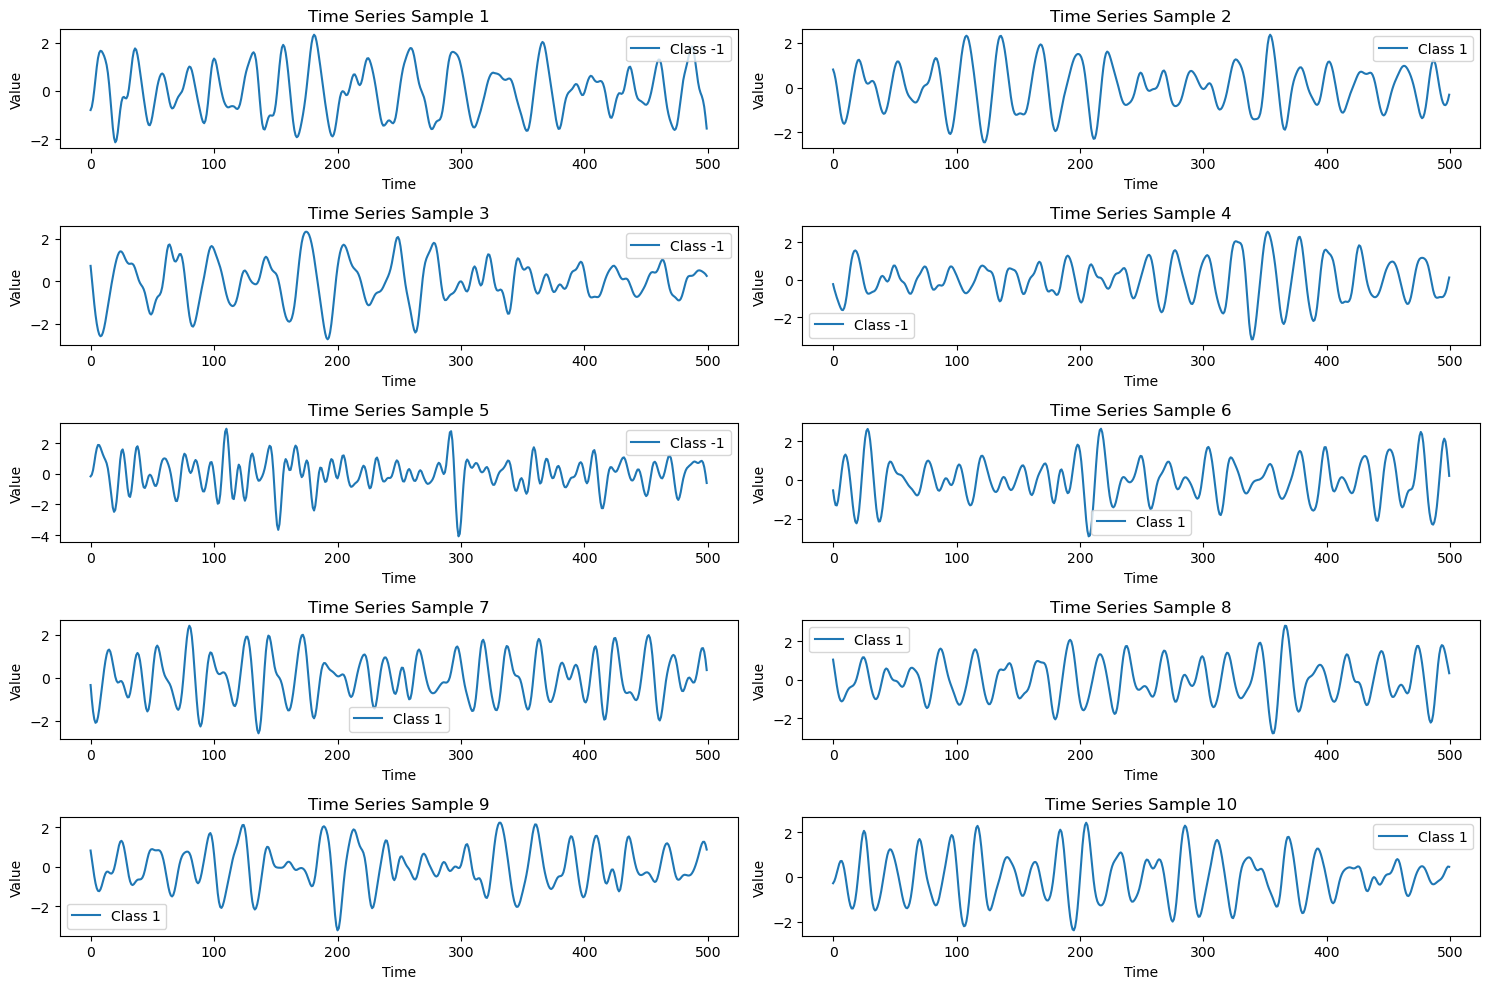

In [7]:
# Plot the first 10 time series
plt.figure(figsize=(15, 10))
for i in range(10):  # Plotting the first 10 samples
    plt.subplot(5, 2, i + 1)  # Arranging plots in 5 rows and 2 columns
    plt.plot(data[i, 0, :], label=f"Class {labels[i]}")
    plt.title(f"Time Series Sample {i+1}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
plt.tight_layout()
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
X = np.array(data) # Your time series data
y = np.array(labels) # Your class labels

# Basic structure
print("Number of Samples:", X.shape[0])
print("Time Series Length:", X.shape[1])
print("Number of Features per Time Point:", X.shape[2])
print("Number of Classes:", np.unique(y).size)

# Checking the first few samples
print("First few class labels:", y[:10])


Number of Samples: 4921
Time Series Length: 1
Number of Features per Time Point: 500
Number of Classes: 2
First few class labels: ['-1' '1' '-1' '-1' '-1' '1' '1' '1' '1' '1']


In [7]:
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)
num_classes = len(np.unique(labels))
print("Number of classes:", num_classes)


Data shape: (4921, 1, 500)
Labels shape: (4921,)
Number of classes: 2


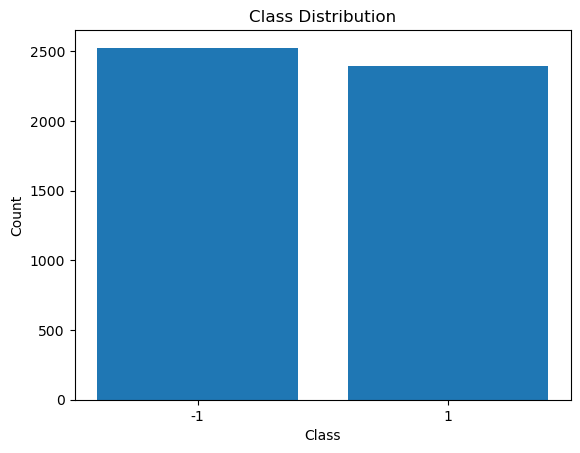

In [10]:
# Class distribution
classes, counts = np.unique(y, return_counts=True)
plt.bar(classes, counts)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [8]:
# Check for missing values
if np.isnan(X).any():
    print("There are missing values in the dataset.")
else:
    print("No missing values found in the dataset.")


No missing values found in the dataset.


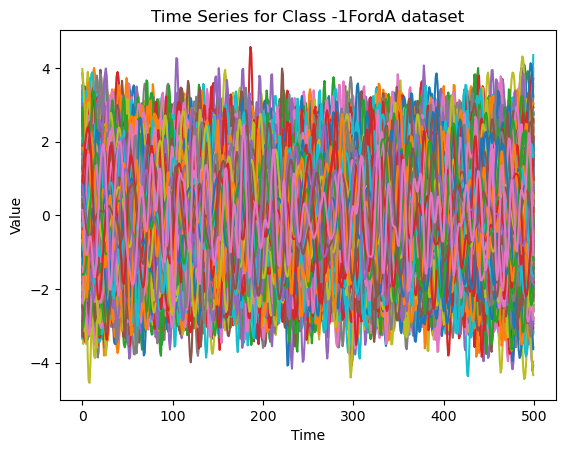

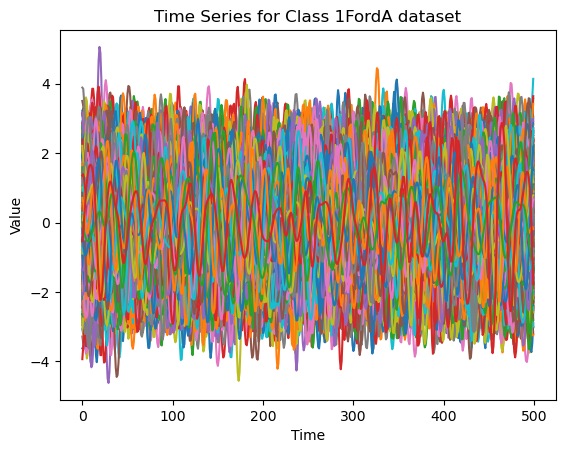

In [9]:

# Unpack the data
time_series_data, class_labels, metadata = load_classification('FordA')
# Convert class labels to integers
class_labels = class_labels.astype(int)


# Get the unique class labels
unique_labels = np.unique(class_labels)

# Plot each class separately
for label in unique_labels:
    class_indices = np.where(class_labels == label)[0]
    
    for idx in class_indices:
        plt.plot(time_series_data[idx, 0, :])  # Assuming 1D time series
        
    plt.title(f'Time Series for Class {label}FordA dataset')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()


### Encoding the Traget Labels and Splitting the dataset into train, test and validation 

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming 'data' and 'labels' are your dataset
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

encoded_labels 

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [11]:
#train_size = 3601
#test_size = 1320  # Make sure that train_size + test_size <= total number of samples

# Split the data
#x_train = data[:train_size]
#y_train = labels[:train_size]
#x_test = data[train_size:train_size+test_size]
#y_test = labels[train_size:train_size+test_size]



# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(data, encoded_labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



In [12]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(2952, 1, 500)
(984, 1, 500)
(985, 1, 500)
(2952,)
(984,)
(985,)


### LSTM Model Architechture 

In [13]:
#LSTM model architechture 

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, (hn, cn) = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out, (hn, cn)


In [14]:
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif self.best_loss - val_loss > self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

In [19]:



X_train = X_train.transpose(0, 2, 1)  # Transposing to get (batch_size, seq_length, num_features)
X_val = X_val.transpose(0, 2, 1)
X_test = X_test.transpose(0, 2, 1)

# Convert to PyTorch tensors
train_data = torch.tensor(X_train, dtype=torch.float32)
train_labels = torch.tensor(y_train, dtype=torch.long)
val_data = torch.tensor(X_val, dtype=torch.float32)
val_labels = torch.tensor(y_val, dtype=torch.long)
test_data = torch.tensor(X_test, dtype=torch.float32)
test_labels = torch.tensor(y_test, dtype=torch.long)

# Create datasets and dataloaders
batch_size = 64
train_dataset = TensorDataset(train_data, train_labels)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_dataset = TensorDataset(val_data, val_labels)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_dataset = TensorDataset(test_data, test_labels)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Initialize model, loss, and optimizer
input_size = 1
print(input_size)
hidden_size =32
num_layers = 4
num_classes = len(np.unique(encoded_labels))
print(num_classes)
model = LSTMModel(input_size, hidden_size, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)

print(np.unique(encoded_labels))


1
2
[0 1]


In [20]:
input_size = 1  # Number of features per time step
hidden_size = 50
num_layers = 2
output_size = 2  # For binary classification

model = LSTMModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 30
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

early_stopping = EarlyStopping(patience=5, min_delta=0.001)

for epoch in range(num_epochs):
    model.train()
    total_loss, total_correct, total_samples = 0, 0, 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs, _ = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    train_loss = total_loss / len(train_loader)
    train_accuracy = total_correct / total_samples
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    model.eval()
    val_loss, val_correct, val_samples = 0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs, _ = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_correct += (predicted == labels).sum().item()
            val_samples += labels.size(0)

    val_loss = val_loss / len(val_loader)
    val_accuracy = val_correct / val_samples
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

Epoch 1/30 - Train Loss: 0.6938, Train Accuracy: 0.5088, Validation Loss: 0.6932, Validation Accuracy: 0.5112
Epoch 2/30 - Train Loss: 0.6928, Train Accuracy: 0.5207, Validation Loss: 0.6934, Validation Accuracy: 0.5112
Epoch 3/30 - Train Loss: 0.6925, Train Accuracy: 0.5146, Validation Loss: 0.6948, Validation Accuracy: 0.5112
Epoch 4/30 - Train Loss: 0.6928, Train Accuracy: 0.5210, Validation Loss: 0.6935, Validation Accuracy: 0.5091
Epoch 5/30 - Train Loss: 0.6928, Train Accuracy: 0.5068, Validation Loss: 0.6938, Validation Accuracy: 0.5112
Epoch 6/30 - Train Loss: 0.6929, Train Accuracy: 0.5203, Validation Loss: 0.6938, Validation Accuracy: 0.5102
Epoch 7/30 - Train Loss: 0.6926, Train Accuracy: 0.5210, Validation Loss: 0.6935, Validation Accuracy: 0.5091
Epoch 8/30 - Train Loss: 0.6922, Train Accuracy: 0.5207, Validation Loss: 0.6939, Validation Accuracy: 0.5112
Epoch 9/30 - Train Loss: 0.6928, Train Accuracy: 0.5183, Validation Loss: 0.6935, Validation Accuracy: 0.5122
Epoch 10/3

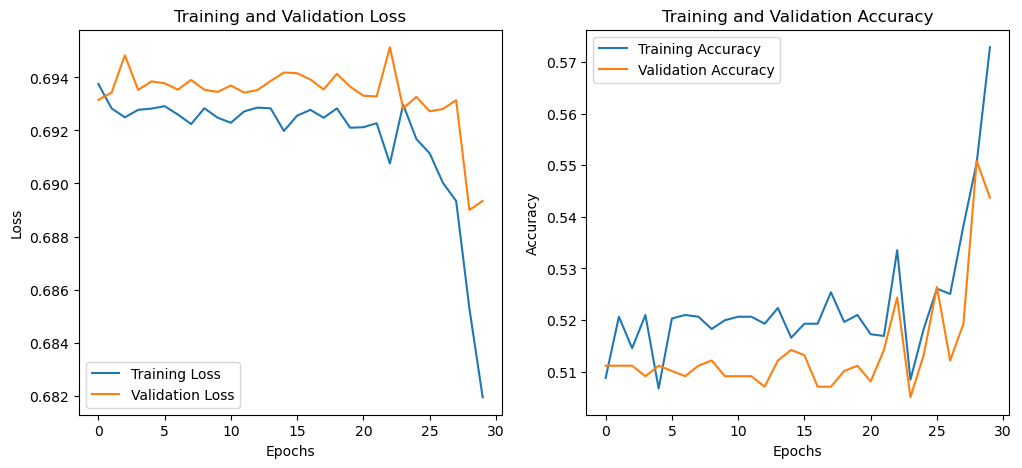

In [21]:
# Plotting training and validation losses
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracies
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Test Accuracy: 54.82%
Test Precision: 0.5695143975680618
Test Recall: 0.5511037991802941


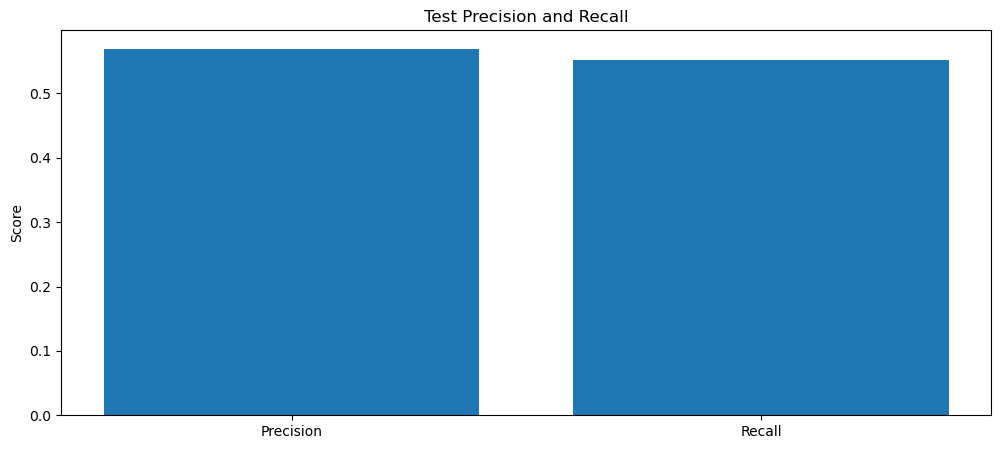

In [22]:
# Evaluate model on test set for precision and recall
model.eval()
test_correct, test_samples = 0, 0
hidden_states = []
hidden_states_shapes = []
test_predictions, test_targets = [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs, (hn, cn) = model(inputs)
        hidden_states.append(hn.cpu().numpy())  # Store hidden states
        hidden_states_shapes.append(hn.shape)
        _, predicted = torch.max(outputs.data, 1)
        test_predictions.extend(predicted.numpy())
        test_targets.extend(labels.numpy())
        test_correct += (predicted == labels).sum().item()
        test_samples += labels.size(0)


# Compute the test accuracy
test_accuracy = test_correct / test_samples
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


# Calculate and plot precision and recall
test_precision = precision_score(test_targets, test_predictions, average='macro')
test_recall = recall_score(test_targets, test_predictions, average='macro')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')

# Plotting precision and recall
plt.figure(figsize=(12, 5))
plt.bar(['Precision', 'Recall'], [test_precision, test_recall])
plt.title('Test Precision and Recall')
plt.ylabel('Score')
plt.show()

In [23]:
# Print the activated hidden states for the test data
for idx, state in enumerate(hidden_states):
    print(f"Hidden States for Batch {idx+1}:")
    print(f"Hidden States for Batch {idx+1}: {state}")
    print("----")
    


Hidden States for Batch 1:
Hidden States for Batch 1: [[[ 0.03346796 -0.0230579  -0.00269406 ... -0.03945171 -0.01624836
   -0.12062693]
  [ 0.074804   -0.00108996 -0.02874778 ... -0.04313561 -0.02629665
    0.00958909]
  [-0.01547826 -0.02707405  0.06446438 ... -0.10174401 -0.04846252
   -0.14783272]
  ...
  [ 0.01296232 -0.00609455 -0.00753203 ... -0.10379264 -0.04127037
   -0.06635778]
  [ 0.07235117 -0.02914559 -0.08154479 ... -0.01415093 -0.01698479
    0.04352023]
  [-0.21838611 -0.03680506  0.04964795 ... -0.25236887 -0.08553816
   -0.12318232]]

 [[ 0.04221282 -0.07843589  0.18701778 ... -0.06322507  0.03465498
   -0.01324869]
  [ 0.03241315 -0.10065795  0.0984552  ... -0.0749032   0.0300135
   -0.02078722]
  [ 0.04398734 -0.03266115  0.12658578 ... -0.03692505  0.0324503
   -0.01103362]
  ...
  [ 0.0528022  -0.09126302  0.10403225 ... -0.06657335  0.03360483
   -0.01903008]
  [ 0.02214219 -0.10286222  0.15131867 ... -0.08341748  0.01970012
   -0.0185726 ]
  [ 0.09569217 -0.059

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


CH Index for k=2: 151.37174950354705


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


CH Index for k=3: 168.24564728382788


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


CH Index for k=4: 176.3088736488922


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


CH Index for k=5: 162.74870144157197


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


CH Index for k=6: 154.65835091928395


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


CH Index for k=7: 149.30622773285128


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


CH Index for k=8: 143.41176963782766


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


CH Index for k=9: 139.5226462679569


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


CH Index for k=10: 136.91849282615502


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


CH Index for k=11: 134.12441113029183


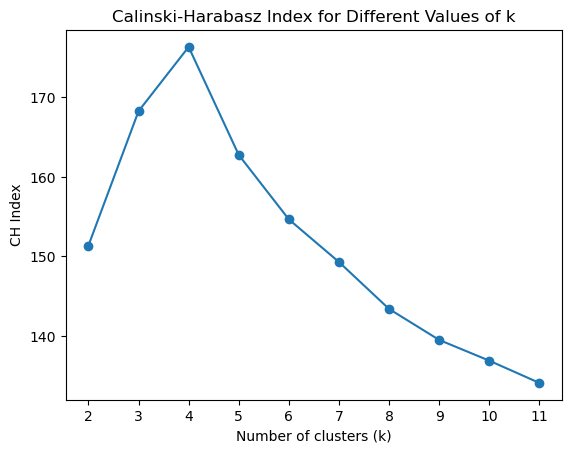

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import numpy as np

# Assuming 'hidden_states' is a list of numpy arrays containing the hidden states for each batch
# Flatten the hidden states to have a shape compatible with KMeans
# Each hidden state is reshaped from (num_layers, batch_size, hidden_size) to (batch_size, num_layers * hidden_size)
flattened_hidden_states = np.concatenate([hs.reshape(hs.shape[1], -1) for hs in hidden_states])

# Apply KMeans clustering for k from 2 to 11 and calculate CH index
ch_indices = []
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(flattened_hidden_states)
    labels = kmeans.labels_
    ch_index = calinski_harabasz_score(flattened_hidden_states, labels)
    ch_indices.append(ch_index)
    print(f"CH Index for k={k}: {ch_index}")

# Optional: Plotting CH indices to visualize
import matplotlib.pyplot as plt

plt.plot(range(2, 12), ch_indices, marker='o')
plt.title('Calinski-Harabasz Index for Different Values of k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('CH Index')
plt.xticks(range(2, 12))
plt.show()


CH Index for k=2: 86.5542474943995
CH Index for k=3: 79.05132901022552
CH Index for k=4: 74.9825834488027
CH Index for k=5: 72.27455639645653
CH Index for k=6: 72.12606951768245
CH Index for k=7: 68.32651105789965
CH Index for k=8: 65.06304047232291
CH Index for k=9: 62.8475898241346
CH Index for k=10: 61.737559233912094
CH Index for k=11: 58.75890031611714


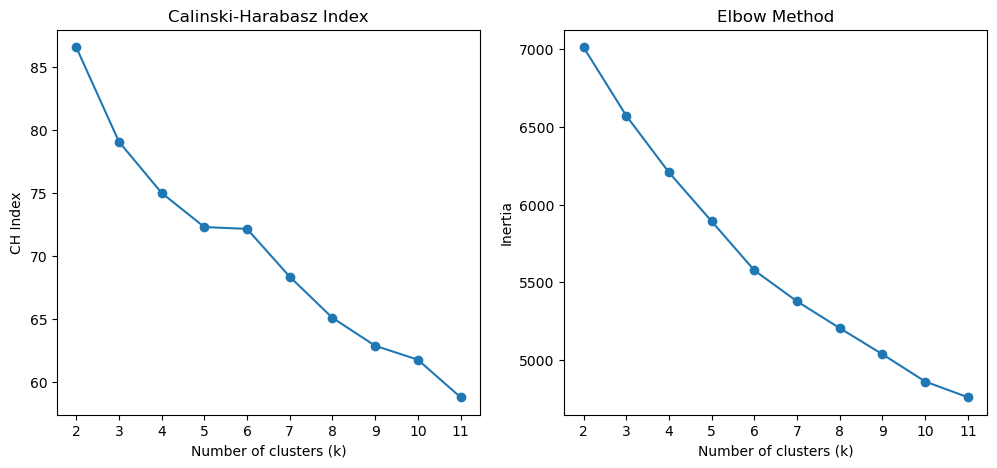

In [79]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'flattened_hidden_states' contains your hidden states reshaped appropriately

# Apply KMeans clustering for k from 2 to 11 and calculate CH index and inertia (for elbow method)
ch_indices = []
inertias = []
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(flattened_hidden_states)
    labels = kmeans.labels_
    ch_index = calinski_harabasz_score(flattened_hidden_states, labels)
    ch_indices.append(ch_index)
    inertias.append(kmeans.inertia_)
    print(f"CH Index for k={k}: {ch_index}")

# Plotting CH indices and Inertia values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 12), ch_indices, marker='o')
plt.title('Calinski-Harabasz Index')
plt.xlabel('Number of clusters (k)')
plt.ylabel('CH Index')
plt.xticks(range(2, 12))

plt.subplot(1, 2, 2)
plt.plot(range(2, 12), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(2, 12))
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


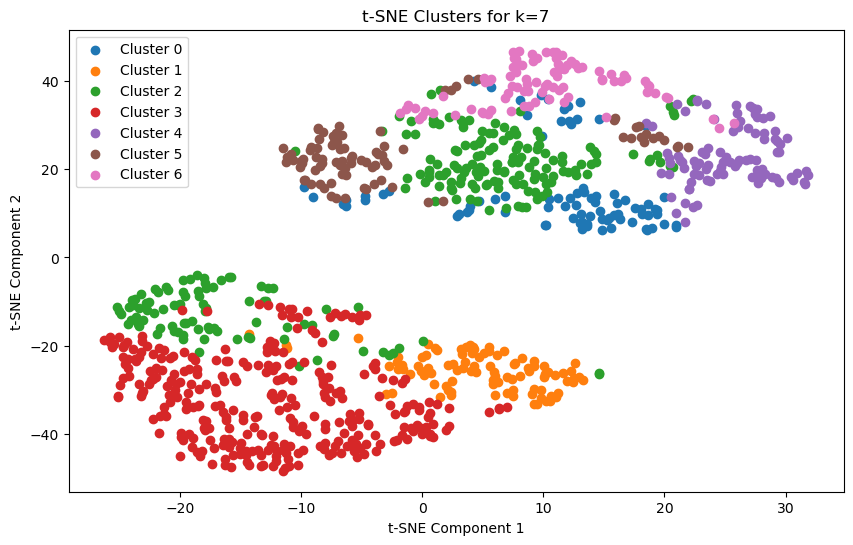

In [25]:
from sklearn.manifold import TSNE

# Choose the value of k based on the elbow plot
optimal_k = 7 #(insert your chosen value of k here)

# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(flattened_hidden_states)

# Perform t-SNE for dimensionality reduction to 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(flattened_hidden_states)

# Plotting t-SNE clusters
plt.figure(figsize=(10, 6))
for i in range(optimal_k):
    cluster_data = tsne_results[labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}')
plt.title(f't-SNE Clusters for k={optimal_k}')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


In [26]:
import numpy as np

# Calculate Intra-cluster distances (average distance to centroid within each cluster)
def intra_cluster_distance(data, kmeans, label):
    cluster_data = data[kmeans.labels_ == label]
    centroid = kmeans.cluster_centers_[label]
    distances = np.linalg.norm(cluster_data - centroid, axis=1)
    return np.mean(distances)

intra_distances = [intra_cluster_distance(flattened_hidden_states, kmeans, i) for i in range(optimal_k)]
print("Intra-cluster distances:", intra_distances)

# Calculate Inter-cluster distances (distance between centroids of clusters)
def inter_cluster_distance(centroids, i, j):
    return np.linalg.norm(centroids[i] - centroids[j])

inter_distances = []
for i in range(optimal_k):
    for j in range(i + 1, optimal_k):
        distance = inter_cluster_distance(kmeans.cluster_centers_, i, j)
        inter_distances.append(distance)
        print(f"Distance between Cluster {i} and Cluster {j}: {distance}")

# Average Inter-cluster Distance
avg_inter_distance = np.mean(inter_distances)
print("Average Inter-cluster Distance:", avg_inter_distance)


Intra-cluster distances: [0.9949061, 0.75969696, 0.9686455, 0.53846, 1.189622, 0.99774146, 1.1797215]
Distance between Cluster 0 and Cluster 1: 1.270959734916687
Distance between Cluster 0 and Cluster 2: 1.1240837574005127
Distance between Cluster 0 and Cluster 3: 1.3844351768493652
Distance between Cluster 0 and Cluster 4: 1.6814842224121094
Distance between Cluster 0 and Cluster 5: 1.4408482313156128
Distance between Cluster 0 and Cluster 6: 1.8142061233520508
Distance between Cluster 1 and Cluster 2: 1.0527374744415283
Distance between Cluster 1 and Cluster 3: 1.1228363513946533
Distance between Cluster 1 and Cluster 4: 1.654310703277588
Distance between Cluster 1 and Cluster 5: 1.2833863496780396
Distance between Cluster 1 and Cluster 6: 1.6540061235427856
Distance between Cluster 2 and Cluster 3: 1.1006966829299927
Distance between Cluster 2 and Cluster 4: 1.470097541809082
Distance between Cluster 2 and Cluster 5: 1.0847649574279785
Distance between Cluster 2 and Cluster 6: 1.587